# Business Problem Statement

- An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
- The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

## Goal
- To identify the features that contributes to predict Lead Conversion.
- Identifying Hot Leads by generating  Lead Score for all leads, so that leads having higher Lead Scores can be contacted with priority for achieving Higher Lead Conversion Rate.

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding Data

In [2]:
# Importing dataset

df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## EDA (Exploratory Data Analysis)

In [3]:
# Checking the shape of the dataset

df.shape

(9240, 37)

In [4]:
# Checking the column names of the dataset

df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Cheocking the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Checking the value distribution of the numerical columns

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the percentage of null values in the dataset

round(df.isnull().sum()/df.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Checking the columns which have null values more than 40 percent.

df.columns[round(df.isnull().sum()/df.shape[0]*100,2) > 40]

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [9]:
# Dropping those columns which have null values more than 40 percent.

df.drop(columns= df.columns[round(df.isnull().sum()/df.shape[0]*100,2) > 40], inplace=True)

In [10]:
# Again checking the percentage of null values in a dataset

round(df.isnull().sum()/df.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Checking the value counts of Country column in a dataset

df['Country'].value_counts(normalize=True)*100

Country
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switze

In [12]:
# Filling the null values in Country column as India by using mode function.

df['Country'] = df['Country'].fillna(df['Country'].mode()[0])

In [13]:
# Checking the columns which have more than 10% null values. 

df.columns[round(df.isnull().sum()/df.shape[0]*100,2) > 10]

Index(['Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City'],
      dtype='object')

In [14]:
# Now we suppose to check specialization column

df['Specialization'].value_counts(normalize=True)

Specialization
Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: proportion, dtype: float64

In [15]:
# Checking the percentage of null values in Specialization column.

df['Specialization'].isnull().sum()/df.shape[0]*100

15.562770562770561

In [16]:
# As we can see we have Select value of 25% in Specialization column, it doesn't make any sense to the column so we replace with null values.

df['Specialization'] = df['Specialization'].replace('Select', np.nan)

In [17]:
# After replacing the select values with null values, again checking the Specialization column.

df['Specialization'].value_counts(normalize=True)

Specialization
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: proportion, dtype: float64

In [18]:
# After replacing the select values with null values, checking the null value percentage in Specialization column.

df['Specialization'].isnull().sum()/df.shape[0]*100

36.58008658008658

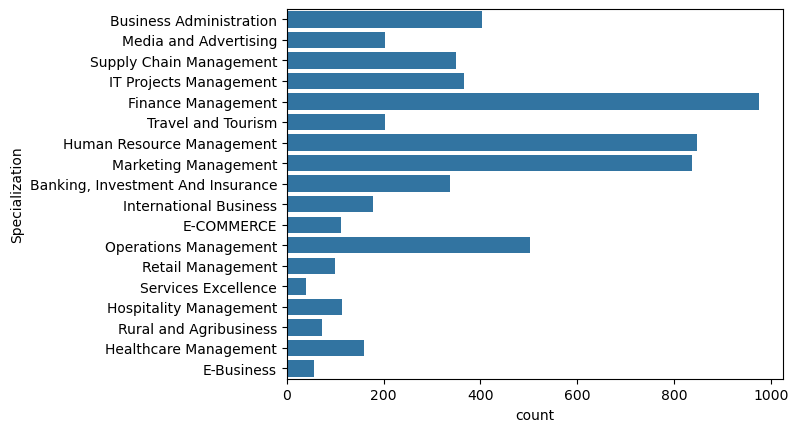

In [19]:
# Barplot to visualize the category distribution in Specialization column

sns.countplot(df['Specialization'])
plt.show()

In [20]:
# Filling the null values in Specialization column as Others because we have 36% of null values and we can't fill the null values with mode option.

df['Specialization'] = df['Specialization'].fillna('Others')

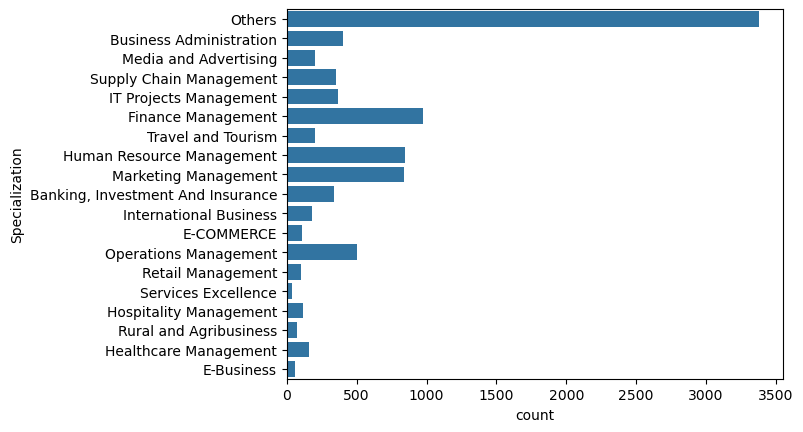

In [21]:
# Again plotting barplot after filling the null values to visualize the category distribution in Specialization column.

sns.countplot(df['Specialization'])
plt.show()

In [22]:
# Checking the next column which have more than 10% of null values

df['How did you hear about X Education'].value_counts(normalize=True)

How did you hear about X Education
Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: proportion, dtype: float64

In [23]:
# As we can see we have Select value of 71%, this column doesn't make any sense so our decision is to drop this column.

df.drop(columns= ['How did you hear about X Education'], inplace=True)

In [24]:
# Checking the next column which have more than 10% of null values

df['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

In [25]:
# Checking the percentage of null values in this column.

df['What is your current occupation'].isnull().sum()/df.shape[0]

0.2911255411255411

In [26]:
# Filling the null values as new category Others because we have 29% of null values, if we impute with mode option it will affect my model and analysis.

df['What is your current occupation'] = df['What is your current occupation'].fillna('Others')

In [27]:
# Checking the next column which have more than 10% null values and their category distribution.

df['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [28]:
# Checking the percentage of null values in this column.

df['What matters most to you in choosing a course'].isnull().sum()/df.shape[0]

0.29318181818181815

In [29]:
# Filling the null values with Others as new cateogory because we have 29% of null values and we can't fill with mode function.

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('Others')

In [30]:
# Checking the next column which have more than 10% null values and their category distribution.

df['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

In [31]:
# Checking the percentage of null values in this column.

df['Tags'].isnull().sum()/df.shape[0]

0.36287878787878786

In [32]:
# Filling the null values with Others as new cateogory because we have 36% of null values and we can't fill with mode function.

df['Tags'] = df['Tags'].fillna('Others')

In [33]:
# Checking the next column which have more than 10% null values and their category distribution.

df['Lead Profile'].value_counts(normalize=True)

Lead Profile
Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: proportion, dtype: float64

In [34]:
# As we can see we have Select value of 63%, this column doesn't make any sense so our decision is to drop this column.

df.drop(columns=['Lead Profile'],inplace=True)

In [35]:
# Checking the next column which have more than 10% null values and their category distribution.

df['City'].value_counts(normalize=True)

City
Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: proportion, dtype: float64

In [36]:
# As we can see we have Select value of 28% in City column, it doesn't make any sense to the column so we replace with null values.

df['City'] = df['City'].replace('Select',np.nan)

In [37]:
# Checking the percentage of null values in this column.

df['City'].isnull().sum()/df.shape[0]

0.3970779220779221

In [38]:
# Filling the null values with Others as new cateogory because we have 39% of null values and we can't fill with mode function.

df['City'] = df['City'].fillna('Others')

In [39]:
# Aain checking the null values in whole dataset

round(df.isnull().sum()/df.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [40]:
# Dropping the null values in TotalVisits column as we have 0.01% of null value, by dropping the null values it doesn't affect my analysis.

df = df[~df['TotalVisits'].isnull()]

In [41]:
# Checking the shape of dataset after dropping the null values.

df.shape

(9103, 30)

In [42]:
# Again checking the null values and we can see that we don't have any null values in a dataset.

round(df.isnull().sum()/df.shape[0],2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

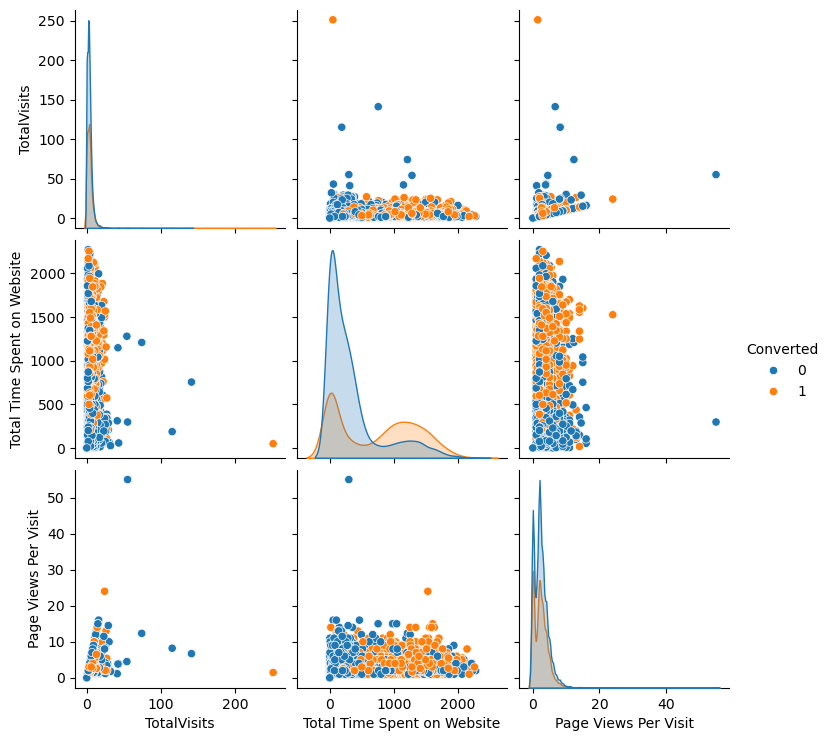

In [43]:
# Plotting pairplot to see if there is any correlation between numerical variables.

sns.pairplot(data=df, vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], hue= 'Converted')
plt.show()

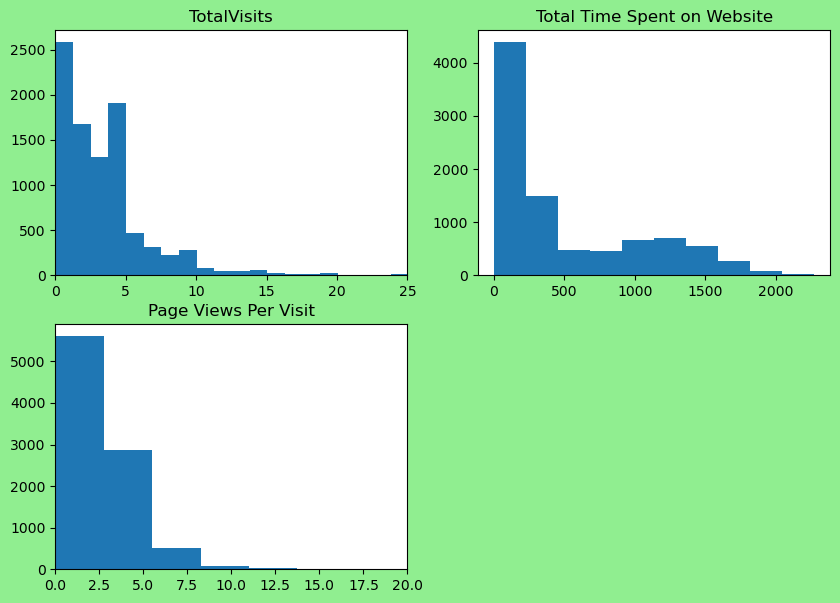

In [44]:
# Plotting histogram for Numerical variables to visualize the value distribution among variables.

plt.figure(figsize=[10,7]).set_facecolor('lightgreen')

plt.subplot(2,2,1)
plt.hist(df['TotalVisits'], bins=200)
plt.xlim(0,25)
plt.title('TotalVisits', fontsize=12)

plt.subplot(2,2,2)
plt.hist(df['Total Time Spent on Website'], bins=10)
plt.title('Total Time Spent on Website', fontsize=12)

plt.subplot(2,2,3)
plt.hist(df['Page Views Per Visit'], bins=20)
plt.xlim(0,20)
plt.title('Page Views Per Visit', fontsize=12)

plt.show()

In [45]:
# Selecting only numerical variables and store them in a separate dataframe.

df_num = df[df.select_dtypes(include=['float','int']).columns]

In [46]:
# Checking numerical dataframe.

df_num.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,660737,0,0.0,0,0.0
1,660728,0,5.0,674,2.5
2,660727,1,2.0,1532,2.0
3,660719,0,1.0,305,1.0
4,660681,1,2.0,1428,1.0


In [47]:
# Checking shape of a numerical dataframe.

df_num.shape

(9103, 5)

In [48]:
# Finding outliers from numerical dataframe.

df_num.describe(percentiles=[0,0.25,0.50,0.75,0.90,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
0%,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
99%,659561.860000,1.000000,17.000000,1838.960000,9.000000


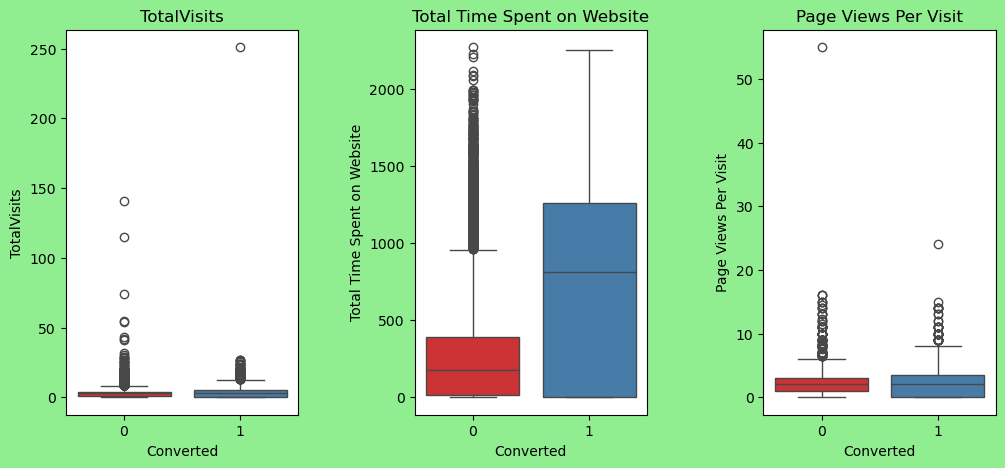

In [49]:
# Boxplot to find the outliers and value distribution in numerical features.

plt.figure(figsize=[12,5]).set_facecolor('lightgreen')

plt.subplot(1,3,1)
sns.boxplot(data= df, y= 'TotalVisits', x= 'Converted', palette='Set1')
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(data= df, y= 'Total Time Spent on Website', x= 'Converted', palette='Set1')
plt.title('Total Time Spent on Website')
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,3,3)
sns.boxplot(data= df, y= 'Page Views Per Visit', x= 'Converted', palette='Set1')
plt.title('Page Views Per Visit')

plt.show()

### Insights
- The median value of ‘Total Time Spent on Website’ is significantly higher for converted leads compared to non-converted ones. The team should focus on targeting customers who spend more time on the website, as they have a greater likelihood of conversion.
- There are many outliers in 'TotalVisits' for leads that were not converted. A significant number of customers are visiting the website frequently but aren't enrolling in the course. The team should investigate why this is happening. Possible reasons could include financial constraints, searching for courses not currently offered by X Education, or finding better alternatives from competitors.

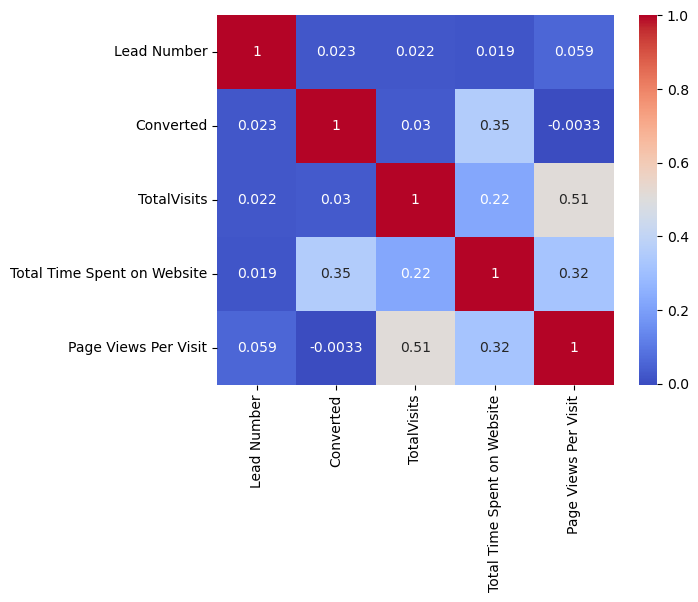

In [50]:
# Heatmap to visualize the correlation between numerical variables.

sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Removing outliers from 'TotalVisits' column in a dataframe.

df = df[df['TotalVisits'] <= 17]
df.shape

(9020, 30)

In [52]:
# Dropping 'Prospect ID' and 'Lead Number' column as they are of no use and could not contribute to our analysis.

df.drop(columns=['Prospect ID','Lead Number'], inplace=True)

In [53]:
# Checking the dataset

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,Interested in other courses,No,No,Others,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,Others,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [54]:
# Checking the value counts of Target variable

df['Converted'].value_counts(normalize=True)

Converted
0    0.620288
1    0.379712
Name: proportion, dtype: float64

In [55]:
# Checking the Country column

df['Country'].value_counts(normalize=True)

Country
India                   0.968514
United States           0.007539
United Arab Emirates    0.005765
Singapore               0.002661
Saudi Arabia            0.002328
United Kingdom          0.001663
Australia               0.001441
Qatar                   0.001109
Hong Kong               0.000776
Bahrain                 0.000776
France                  0.000665
Oman                    0.000665
Germany                 0.000443
unknown                 0.000443
South Africa            0.000443
Nigeria                 0.000443
Kuwait                  0.000443
Canada                  0.000443
Sweden                  0.000333
China                   0.000222
Asia/Pacific Region     0.000222
Uganda                  0.000222
Bangladesh              0.000222
Italy                   0.000222
Belgium                 0.000222
Netherlands             0.000222
Ghana                   0.000222
Philippines             0.000222
Russia                  0.000111
Switzerland             0.000111
Vi

In [56]:
# As we can see that India contributed 96% in dataset while other all countries contributed remaining 4%, so our decision is replace all the countries except 'India' with 'Outside India'

df['Country'] = df['Country'].apply(lambda x: x if x=='India' else 'Outside India')

In [57]:
# No checking the Country column again and now we have remaining 4% of values as 'Outside India'

df['Country'].value_counts(normalize=True)

Country
India            0.968514
Outside India    0.031486
Name: proportion, dtype: float64

In [58]:
# Checking the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9020 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   9020 non-null   object 
 3   Do Not Call                                    9020 non-null   object 
 4   Converted                                      9020 non-null   int64  
 5   TotalVisits                                    9020 non-null   float64
 6   Total Time Spent on Website                    9020 non-null   int64  
 7   Page Views Per Visit                           9020 non-null   float64
 8   Last Activity                                  9020 non-null   object 
 9   Country                                        9020 non-n

In [59]:
# Dropping the null values in Lead Source as we have only 0.01% of null values in a dataset.

df = df[~df['Lead Source'].isnull()]

In [60]:
# Checking the shape of dataset after dropping the null rows.

df.shape

(8991, 28)

In [61]:
# Checking Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Country                                        8991 non-n

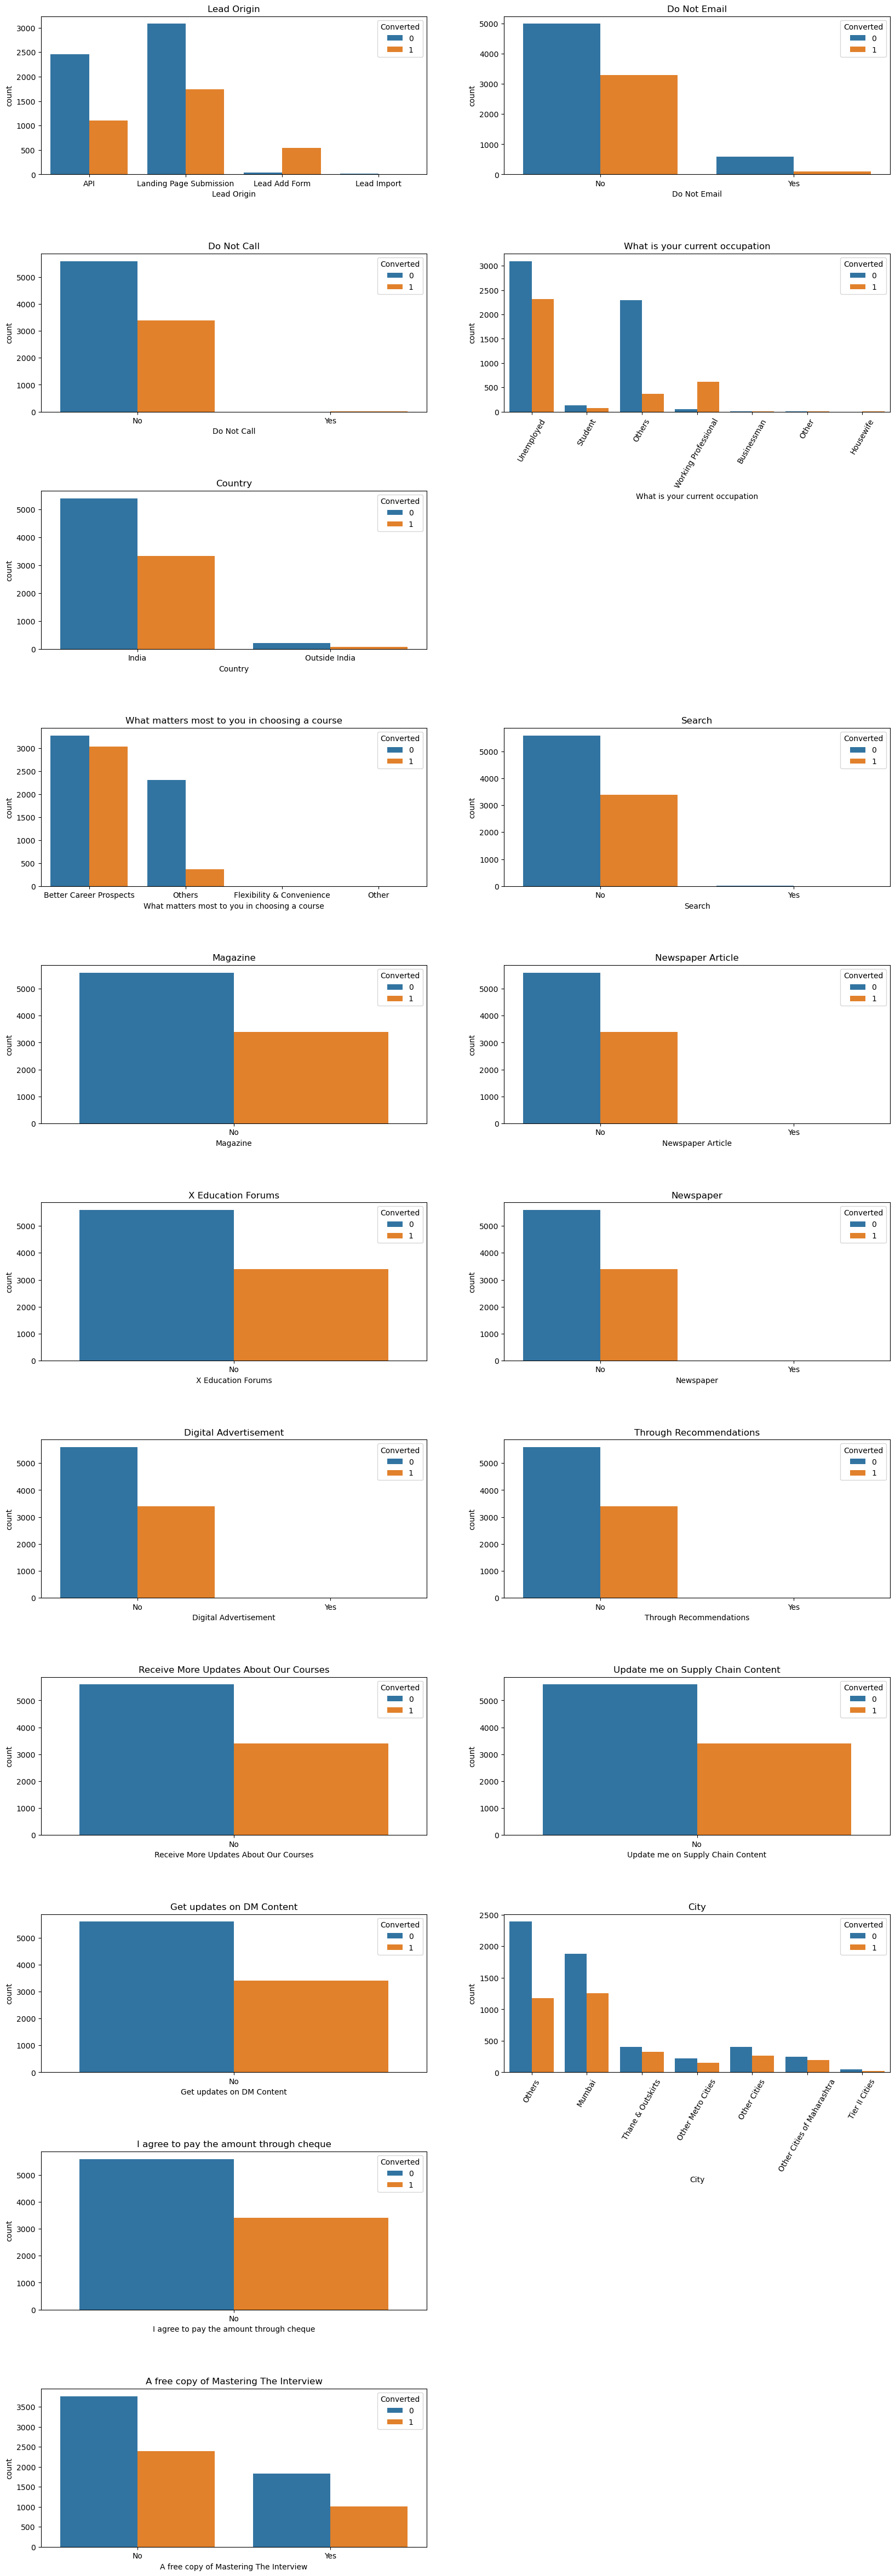

In [62]:
# Plotting countplot for categorical columns with respect to Target variable

plt.figure(figsize=[20,60])

plt.subplot(11,2,1)
sns.countplot(x=df['Lead Origin'], hue=df['Converted'])
plt.title('Lead Origin')

plt.subplot(11,2,2)
sns.countplot(x= df['Do Not Email'], hue= df['Converted'])
plt.title('Do Not Email')

plt.subplot(11,2,3)
sns.countplot(x= df['Do Not Call'], hue= df['Converted'])
plt.title('Do Not Call')

plt.subplot(11,2,4)
sns.countplot(x= df['What is your current occupation'], hue= df['Converted'])
plt.xticks(rotation=60)
plt.title('What is your current occupation')

plt.subplot(11,2,5)
sns.countplot(x= df['Country'], hue= df['Converted'])
plt.title('Country')

plt.subplot(11,2,7)
sns.countplot(x= df['What matters most to you in choosing a course'], hue= df['Converted'])
plt.title('What matters most to you in choosing a course')

plt.subplot(11,2,8)
sns.countplot(x= df['Search'], hue= df['Converted'])
plt.title('Search')

plt.subplot(11,2,9)
sns.countplot(x= df['Magazine'], hue= df['Converted'])
plt.subplots_adjust(hspace=0.5)
plt.title('Magazine')

plt.subplot(11,2,10)
sns.countplot(x= df['Newspaper Article'], hue= df['Converted'])
plt.title('Newspaper Article')

plt.subplot(11,2,11)
sns.countplot(x= df['X Education Forums'], hue= df['Converted'])
plt.title('X Education Forums')

plt.subplot(11,2,12)
sns.countplot(x= df['Newspaper'], hue= df['Converted'])
plt.title('Newspaper')

plt.subplot(11,2,13)
sns.countplot(x= df['Digital Advertisement'], hue= df['Converted'])
plt.title('Digital Advertisement')

plt.subplot(11,2,14)
sns.countplot(x= df['Through Recommendations'], hue= df['Converted'])
plt.title('Through Recommendations')

plt.subplot(11,2,15)
sns.countplot(x= df['Receive More Updates About Our Courses'], hue= df['Converted'])
plt.title('Receive More Updates About Our Courses')

plt.subplot(11,2,16)
sns.countplot(x= df['Update me on Supply Chain Content'], hue= df['Converted'])
plt.title('Update me on Supply Chain Content')

plt.subplot(11,2,17)
sns.countplot(x= df['Get updates on DM Content'], hue= df['Converted'])
plt.title('Get updates on DM Content')

plt.subplot(11,2,18)
sns.countplot(x= df['City'], hue= df['Converted'])
plt.xticks(rotation=60)
plt.title('City')

plt.subplot(11,2,19)
sns.countplot(x= df['I agree to pay the amount through cheque'], hue= df['Converted'])
plt.title('I agree to pay the amount through cheque')

plt.subplot(11,2,21)
sns.countplot(x= df['A free copy of Mastering The Interview'], hue= df['Converted'])
plt.title('A free copy of Mastering The Interview')

plt.show()

### Insights
- Leads originating from the 'Lead Add Form' have a significantly higher chance of being successfully converted.
- Leads with "Working Professionals" as their occupation have a higher likelihood of being successfully converted.
- Mostly people are from India and looking for Better Career Prospects but most of them are not converted as they have may be financial issues or they can’t able to attend live courses, X Education can focus on diversified courses or they can launch some EMI option for conversions.

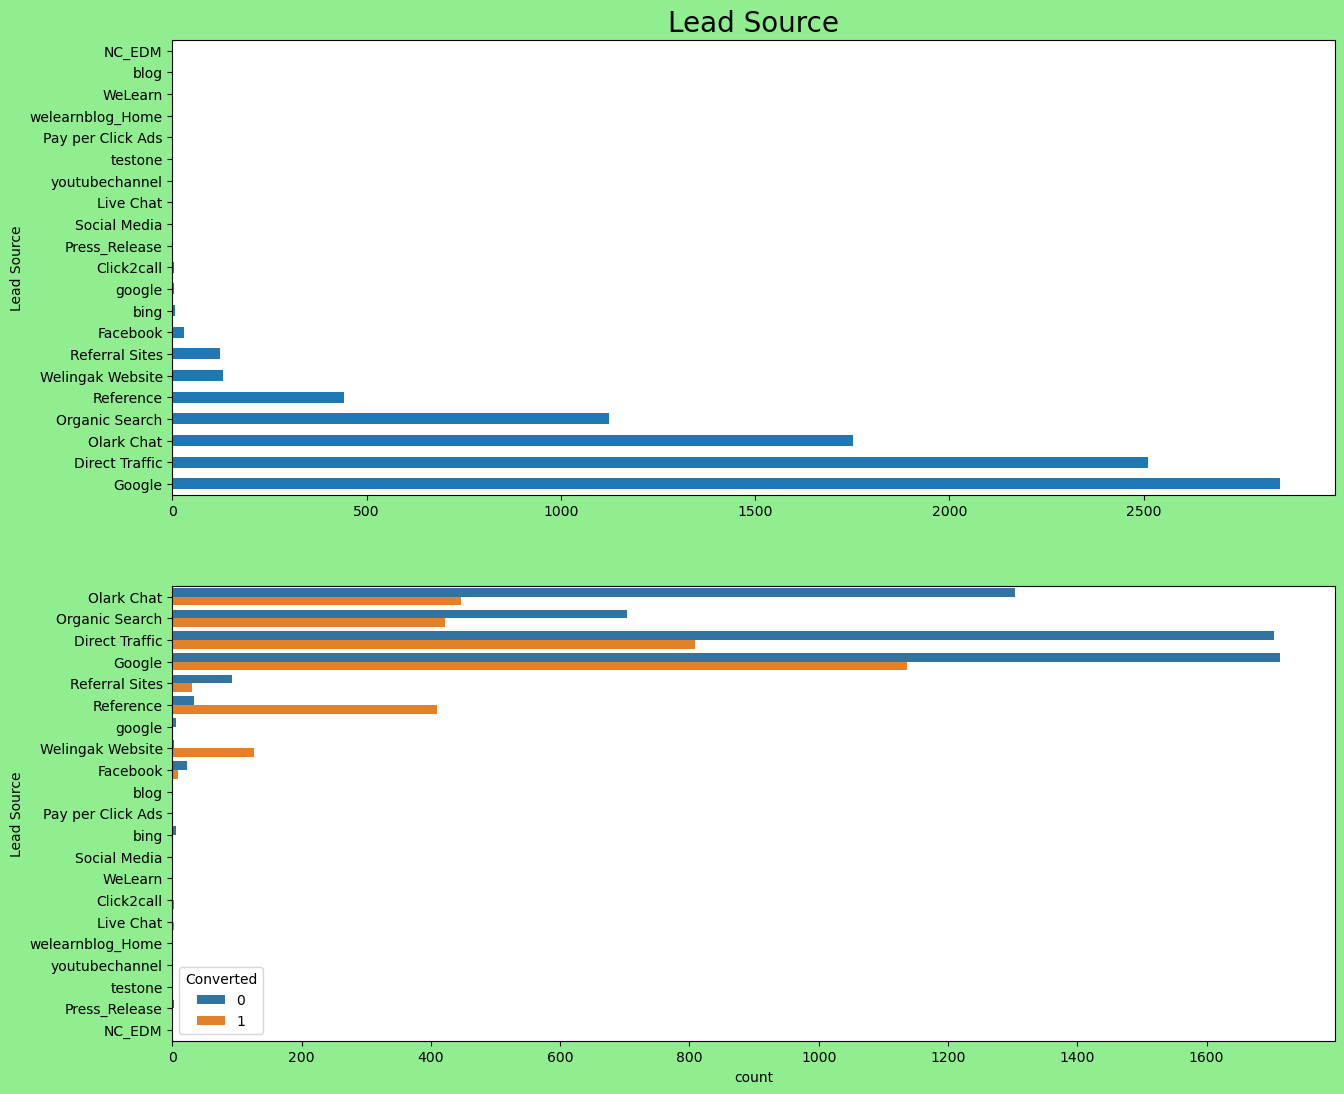

In [63]:
# Barplot to visualize the value distribution of 'Lead Source' column with respect to Target variable 'Converted'

plt.figure(figsize=[15,13]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['Lead Source'].value_counts().plot.barh()
plt.title('Lead Source', fontsize=20)

plt.subplot(2,1,2)
sns.countplot(y= df['Lead Source'], hue= df['Converted'])

plt.show()

### Insights 
- Leads from the "Reference" type of Lead Source have a very high success rate, so the team should prioritize these customers. Although other sources bring in fewer leads, they still have a strong conversion rate. Additionally, customers coming through Organic Search also show a significantly higher chance of successful conversion.

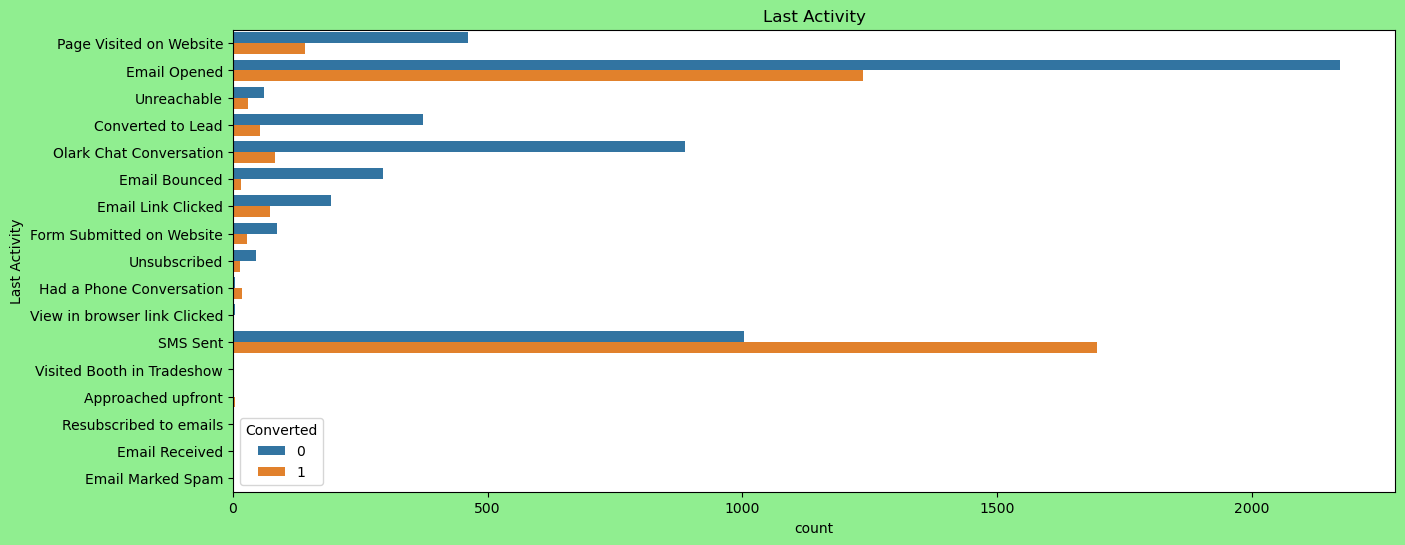

In [64]:
# Barplot to visualize the value distribution of Last Activity column with respect to Target variable 'Converted'

plt.figure(figsize=[15,6]).set_facecolor('lightgreen')
sns.countplot(y= df['Last Activity'], hue= df['Converted'])
plt.title('Last Activity')
plt.show()

### Insights
- The conversion rate of ‘SMS Sent’ have very high success ratio. Although other sources also have a strong conversion rate like E-mail opened. X Education can focus on this Activity and can increase their conversion rate.

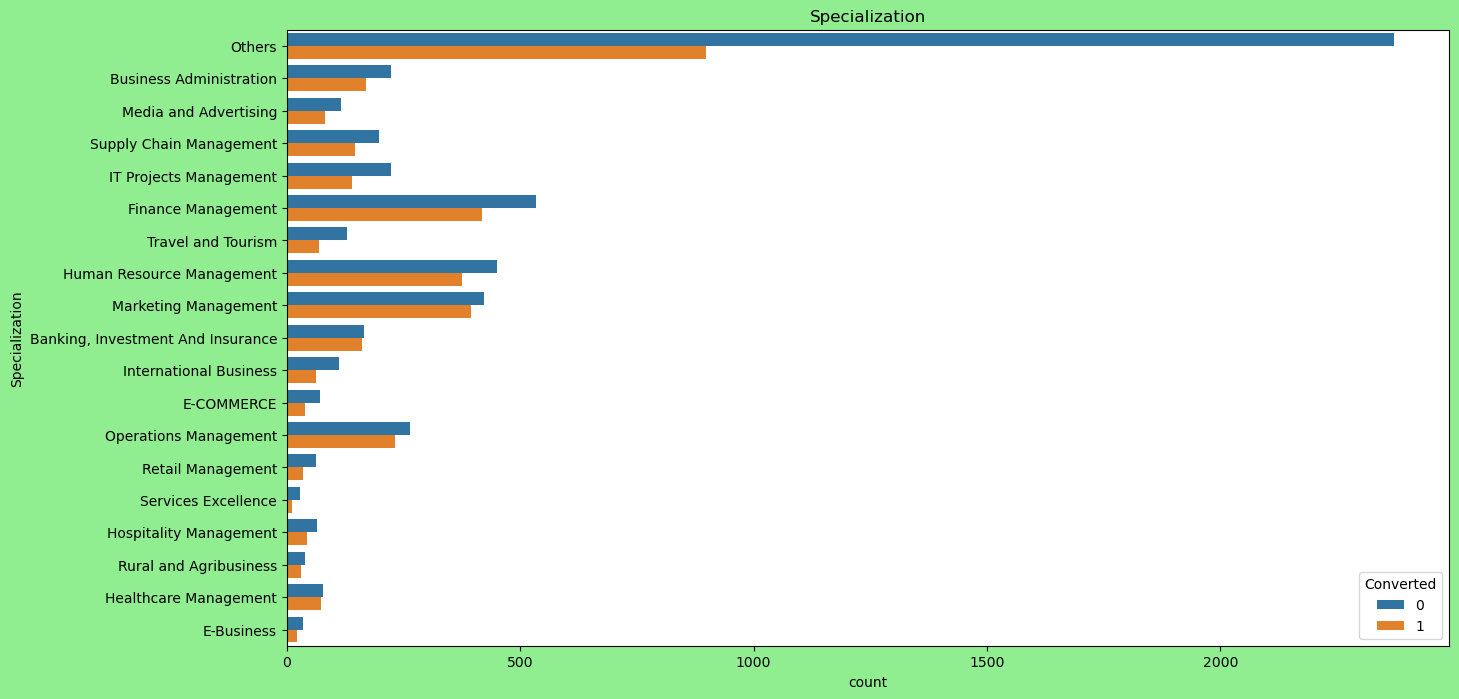

In [65]:
# Barplot to visualize the value distribution of 'Specialization' column with respect to Target variable 'Converted'

plt.figure(figsize=[15,8]).set_facecolor('lightgreen')
sns.countplot(y= df['Specialization'], hue= df['Converted'])
plt.title('Specialization')
plt.show()

### Insights
- People who have mentioned their Specialization in the form have higher chance of opting the course as compared to those who didn’t mention.

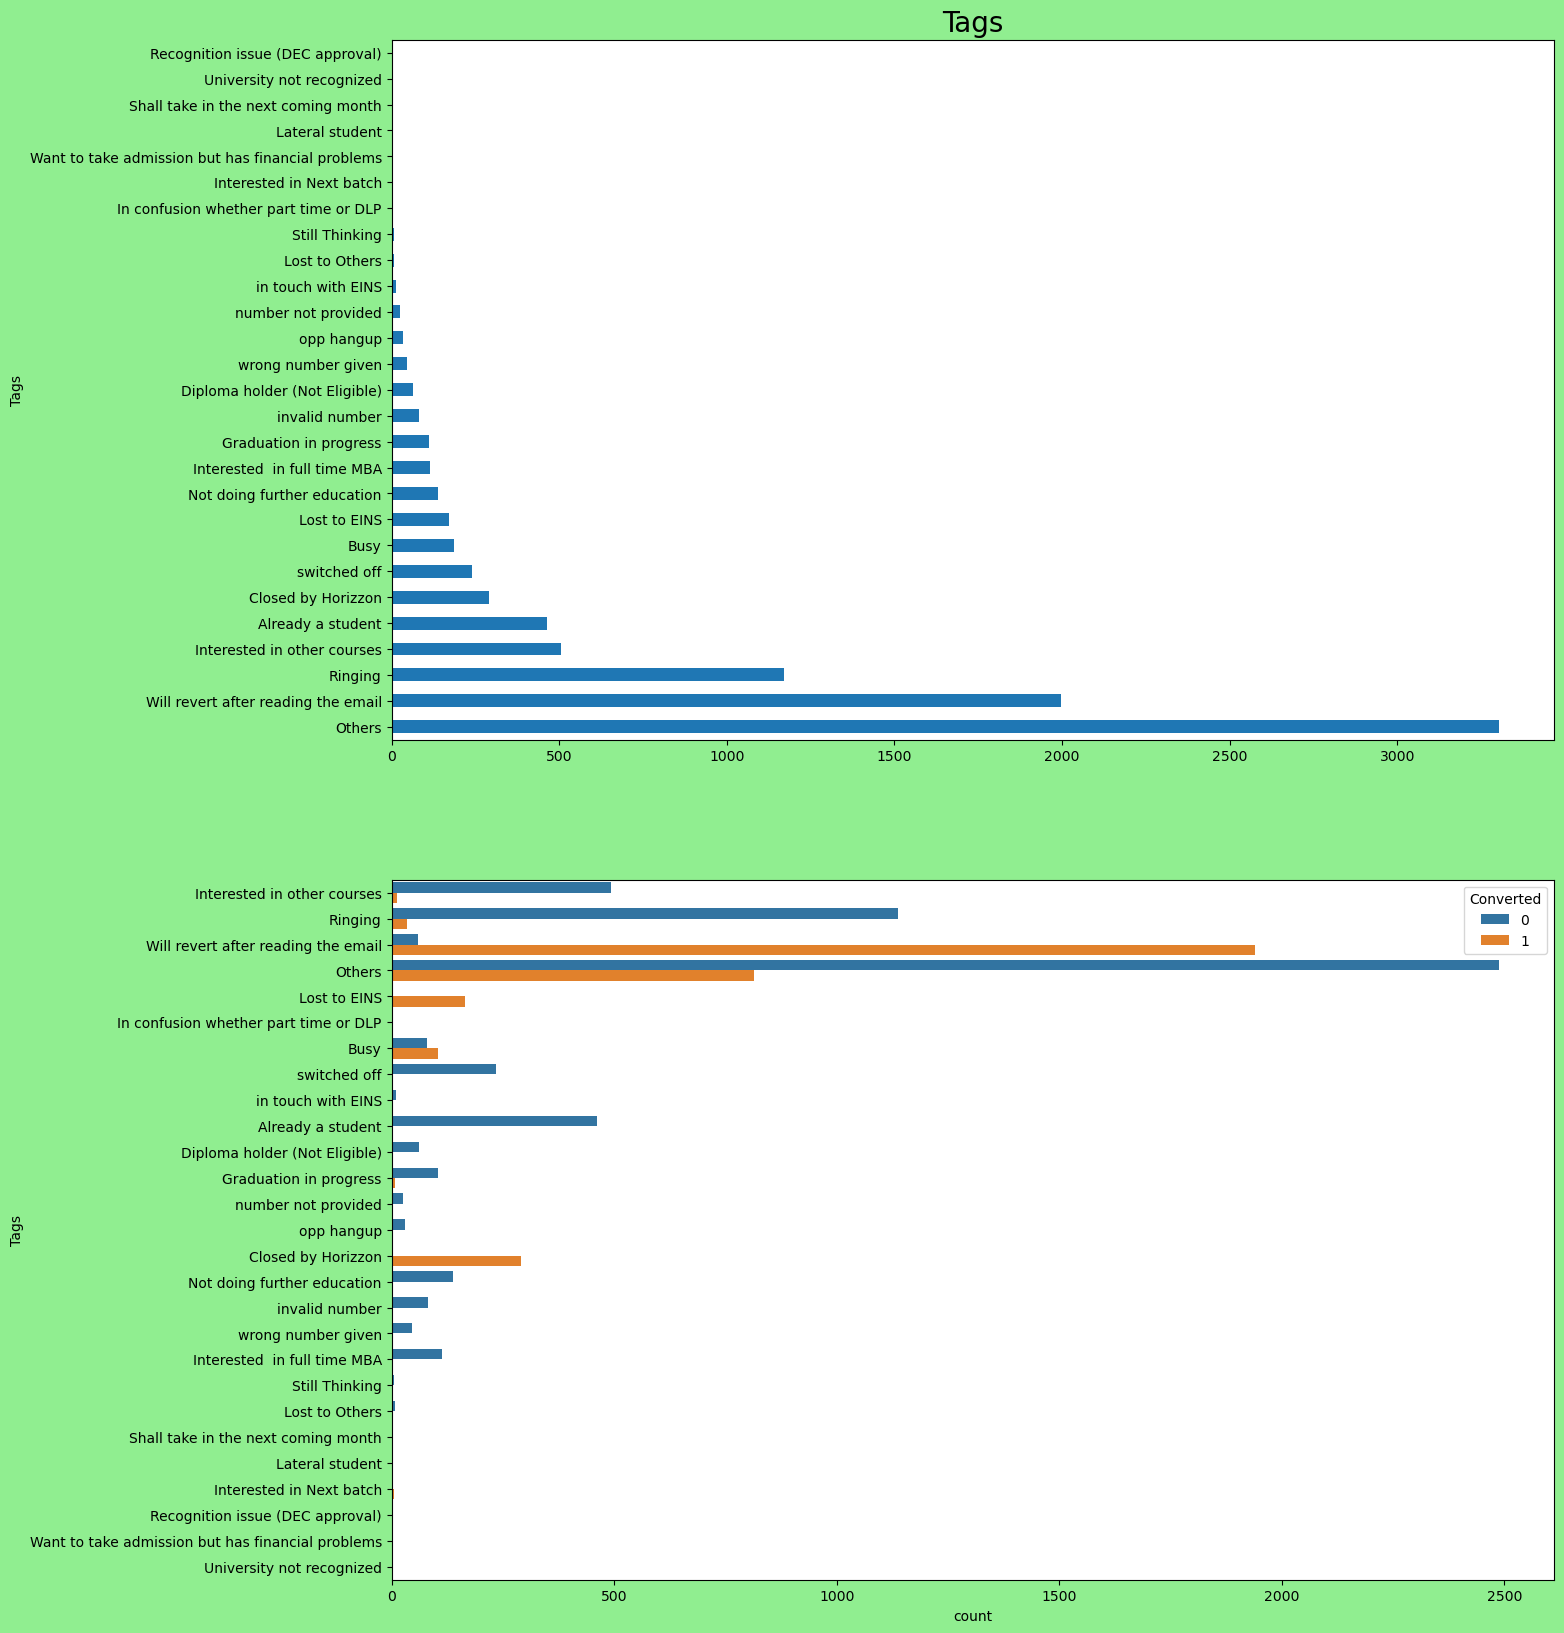

In [66]:
# Barplot to visualize the value distribution of 'Tags' column with respect to Target variable 'Converted'

plt.figure(figsize=[15,20]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['Tags'].value_counts().plot.barh()
plt.title('Tags', fontsize=20)

plt.subplot(2,1,2)
sns.countplot(y= df['Tags'], hue= df['Converted'])

plt.show()

### Insights
- People with a Tag ‘Will revert after reading the email’ have very high chance of conversion. Company can focus on creating and sending a good creative e-mail to the applicants which ensures to give more and more information regarding respective courses to the applicants.

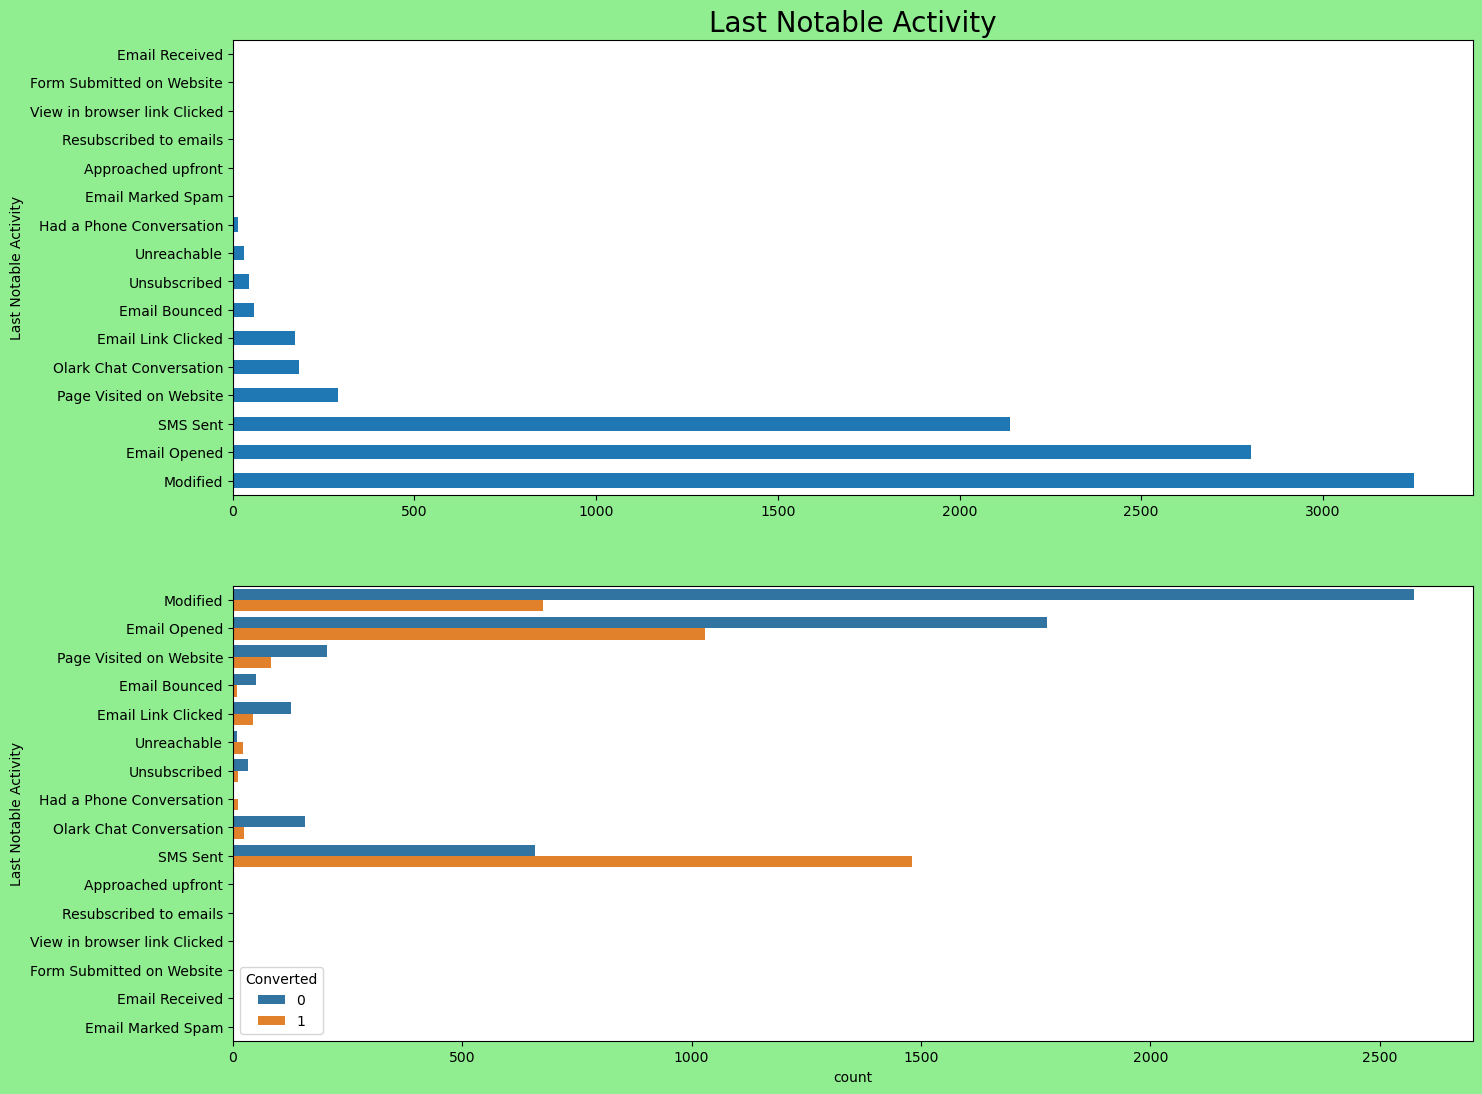

In [67]:
# Barplot to visualize the value distribution of 'Last Notable Activity' column with respect to Target variable 'Converted'

plt.figure(figsize=[16,13]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['Last Notable Activity'].value_counts().plot.barh()
plt.title('Last Notable Activity', fontsize=20)

plt.subplot(2,1,2)
sns.countplot(y= df['Last Notable Activity'], hue= df['Converted'])

plt.show()

In [68]:
# Dropping 'Country' column because we have 96% of candidates from India and it does not contribute much in our analysis.
# Also dropping 'Tags' column because this given tags is feedback entered by calling team while making calls.

df.drop(columns=['Country','Tags'], inplace=True)

In [69]:
# Checking the dataset after removal of Outliers.

df.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,...,No,No,No,No,No,No,Others,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,...,No,No,No,No,No,No,Others,No,No,Email Opened


In [70]:
# Now checking dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 non-n

In [71]:
# Extracting binary variables and store them in a separate list.

binary_var = ['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
             'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
             'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [72]:
# Converting values of binary variables from 'Yes' to '1' and 'No' to '0'.

df[binary_var] = df[binary_var].replace({'Yes':1, 'No':0})

In [73]:
# Checking if the values being changed or not.

df[binary_var].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
# Checking the shape of the dataframe.

df.shape

(8991, 26)

In [75]:
# Checking info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   int64  
 3   Do Not Call                                    8991 non-null   int64  
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 non-n

In [76]:
# Creating the list of categorical variables

cat_var = df.select_dtypes(include=['object']).columns

In [77]:
# Creating dummy variables for categorical columns for model building.

df = pd.get_dummies(df, columns=cat_var, dtype=int, drop_first=True)

In [78]:
# Now checking the shape of a dataset to know how much features we have now.

df.shape

(8991, 105)

In [79]:
# Creating the list of numerical variables

num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [80]:
# Importing required libraries for Model building process.

import statsmodels.api as sm

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn import metrics

In [81]:
# Splitting the dataset for training and testing the Model.

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [82]:
# Checking the shape of training dataset.

df_train.shape

(6293, 105)

In [83]:
# Checking the shape of test dataset.

df_test.shape

(2698, 105)

In [84]:
# Fitting and transforming the numerical variables for creating the model

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6293.000000,6293.000000,6293.000000
mean,0.191483,0.210690,0.148608
std,0.177691,0.239008,0.130442
min,0.000000,0.000000,0.000000
25%,0.058824,0.004842,0.062500
50%,0.176471,0.106954,0.125000
75%,0.294118,0.400968,0.208125
max,1.000000,1.000000,1.000000


## Model Building

In [85]:
# Creating X and y for training the model

y_train = df_train.pop('Converted')
X_train = df_train

### Creating Model with all the features

In [86]:
# Creating model with all the features

X_train_sm = sm.add_constant(X_train)

lr = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

lr = lr.fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6200
Model Family:                Binomial   Df Model:                           92
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 21 Oct 2024   Deviance:                   1.4617e+05
Time:                        09:38:49   Pearson chi2:                 7.15e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    2.241e+15   6.45e+07   3.47e+07      0.000    2.24e+15    2.24e+15
Do Not Email                                                            -3.745e+14   4.49e+06  -8.33e+07      0.000   -3.74e+14   -3.74e+14
Do Not Call                                                              1.393e+15   4.78e+07   2.92e+07      0.000    1.39e+15    1.39e+15
TotalVisits                                                              9.252e+14   7.79e+06   1.19e+08      0.000    9.25e+14    9.25e+14
Total Time Spent on Website                                              3.453e+15   4.13e+06   8.36e+08      0.000    3.45e+15    3.45e+15
Page Views Per Visit                                                    -1.324e+15    1.1e+07   -1.2e+08      0.000   -1.32e+15   -1.32e+15
Search                                                                  -1.614e+12   2.14e+07  -7.54e+04      0.000   -1.61e+12   -1.61e+12
Magazine                                                                   20.2393   2.49e-07   8.13e+07      0.000      20.239      20.239
Newspaper Article                                                        3.901e+15   6.74e+07   5.79e+07      0.000     3.9e+15     3.9e+15
X Education Forums                                                         -8.7593   2.06e-07  -4.25e+07      0.000      -8.759      -8.759
Newspaper                                                               -8.044e+15   6.75e+07  -1.19e+08      0.000   -8.04e+15   -8.04e+15
Digital Advertisement                                                    -1.15e+15   4.77e+07  -2.41e+07      0.000   -1.15e+15   -1.15e+15
Through Recommendations                                                 -1.475e+15   3.53e+07  -4.18e+07      0.000   -1.47e+15   -1.47e+15
Receive More Updates About Our Courses                                    -11.5023   2.39e-07  -4.81e+07      0.000     -11.502     -11.502
Update me on Supply Chain Content                                           5.1826   2.58e-07   2.01e+07      0.000       5.183       5.183
Get updates on DM Content                                                 -33.3871   2.36e-07  -1.41e+08      0.000     -33.387     -33.387
I agree to pay the amount through cheque                                  -23.9548   4.07e-07  -5.88e+07      0.000     -23.955     -23.955
A free copy of Mastering The Interview                                  -7.623e+13   2.79e+06  -2.74e+07      0.000   -7.62e+13   -7.62e+13
Lead Origin_Landing Page Submission                                      7.245e+14   3.73e+06   1.94e+08      0.000    7.25e+14    7.25e+14
Lea

In [87]:
# Feature selection using RFE method and first start with 20 varibles.

lr = LogisticRegression()
lr.fit(X_train, y_train )

rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [88]:
# Checking RFE selected columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 40),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 12),
 ('Magazine', False, 79),
 ('Newspaper Article', False, 9),
 ('X Education Forums', False, 78),
 ('Newspaper', False, 13),
 ('Digital Advertisement', False, 50),
 ('Through Recommendations', False, 48),
 ('Receive More Updates About Our Courses', False, 80),
 ('Update me on Supply Chain Content', False, 81),
 ('Get updates on DM Content', False, 82),
 ('I agree to pay the amount through cheque', False, 83),
 ('A free copy of Mastering The Interview', False, 47),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 60),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark

In [89]:
# Storing RFE selected column names in separate list

cols = X_train.columns[rfe.support_]

In [90]:
# Taking training dataset with RFE selected variables

X_train_rfe = X_train[cols]

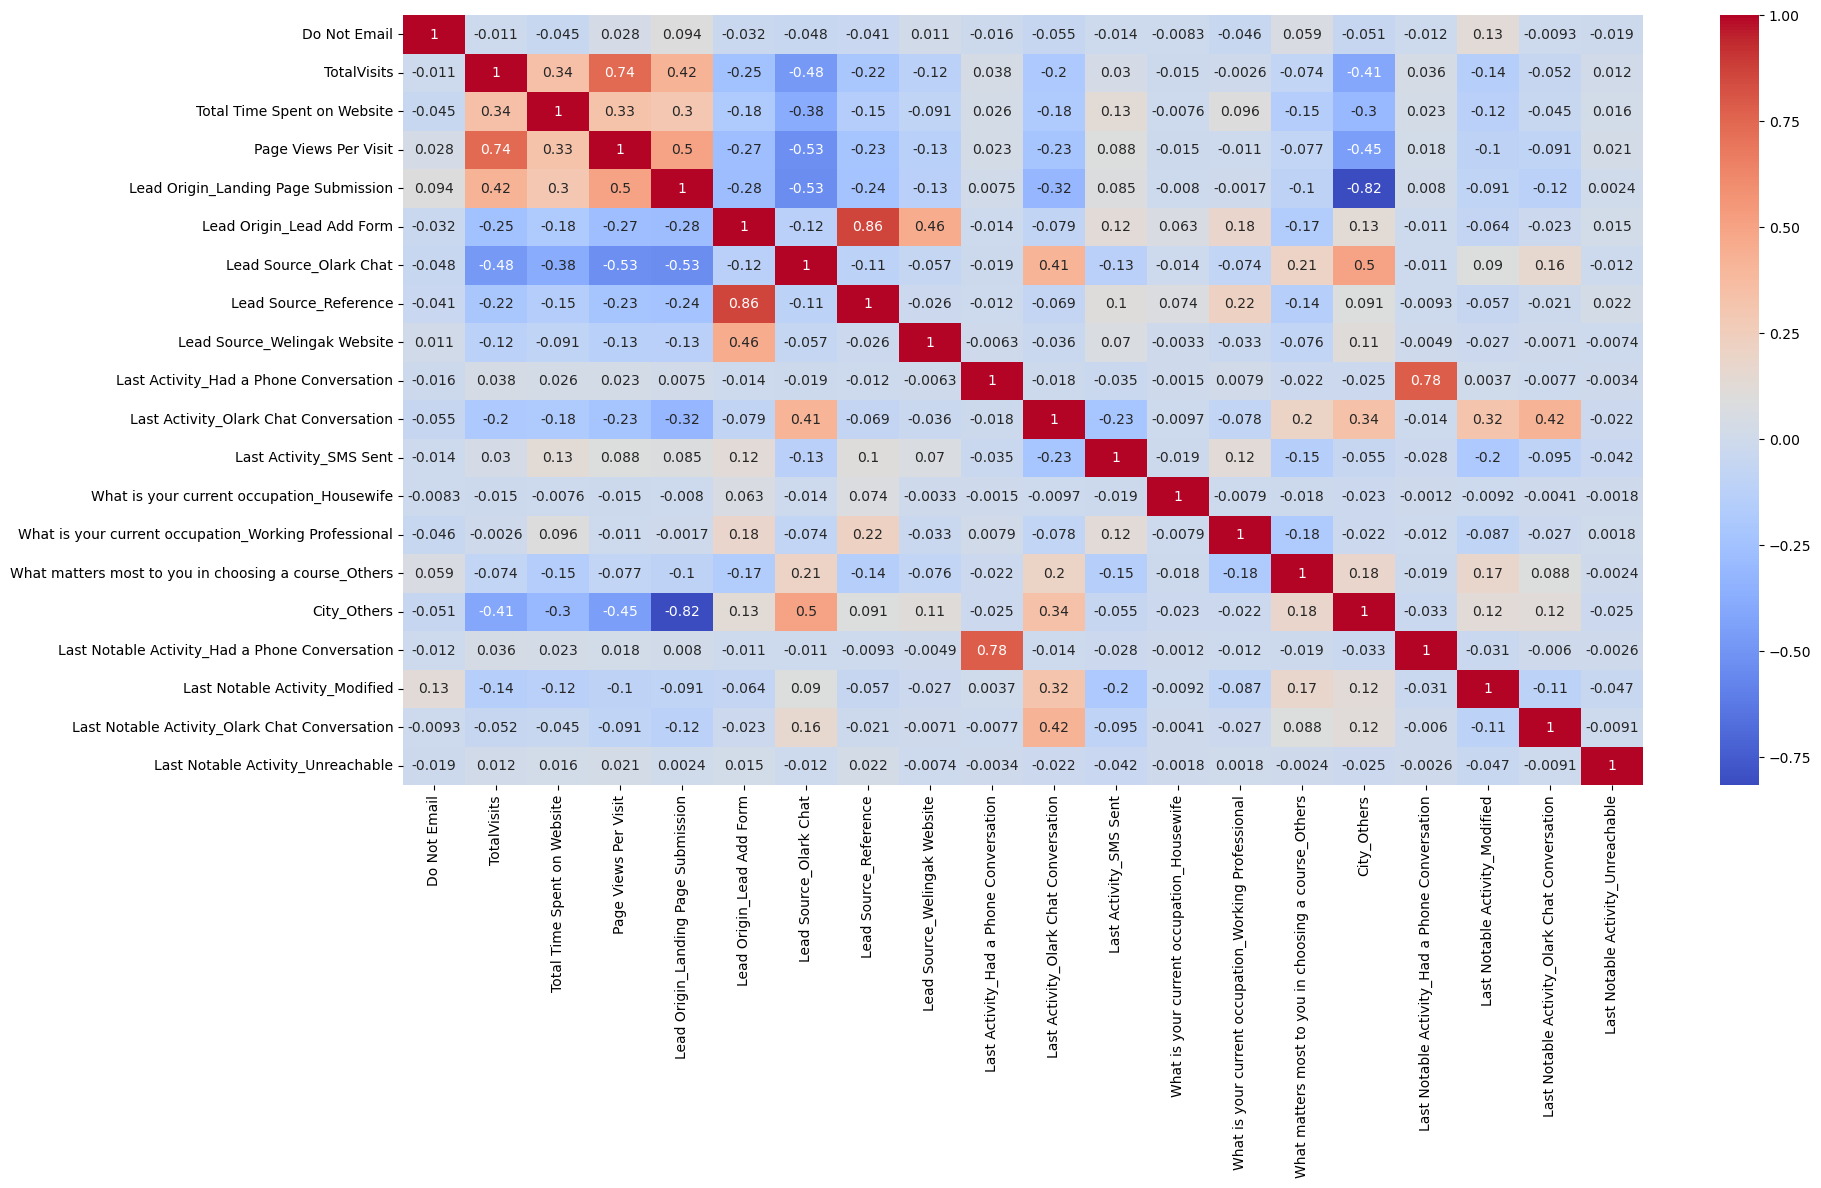

In [91]:
# Checking the correlation between variables by plotting heatmap

plt.figure(figsize=[20,10])
sns.heatmap(X_train_rfe.corr(), annot=True, cmap='coolwarm')
plt.show()

- It can be seen that 'Lead Origin_Lead Add Form' has very high correlation (0.86) with 'Lead Source_Reference', so we'll drop 'Lead Source_Reference' column. 'Lead_Origin_Landing Page Submission' has very high correlation with 'City_Others', so We'll drop 'City_Others' column. 'Last Activity_Had a Phone Conversation' has high correlation with 'Last Notable Activity_Had a Phone Conversation', so we'll drop 'Last Notable Activity_Had a Phone Conversation'. 'TotalVisits' has high correlation with 'Page Views Per Visit', so we'll drop 'Page Views Per Visit'column.

In [92]:
X_train_rfe.drop(columns=['Lead Source_Reference','City_Others',
                          'Last Notable Activity_Had a Phone Conversation',
                          'Page Views Per Visit'], inplace=True)

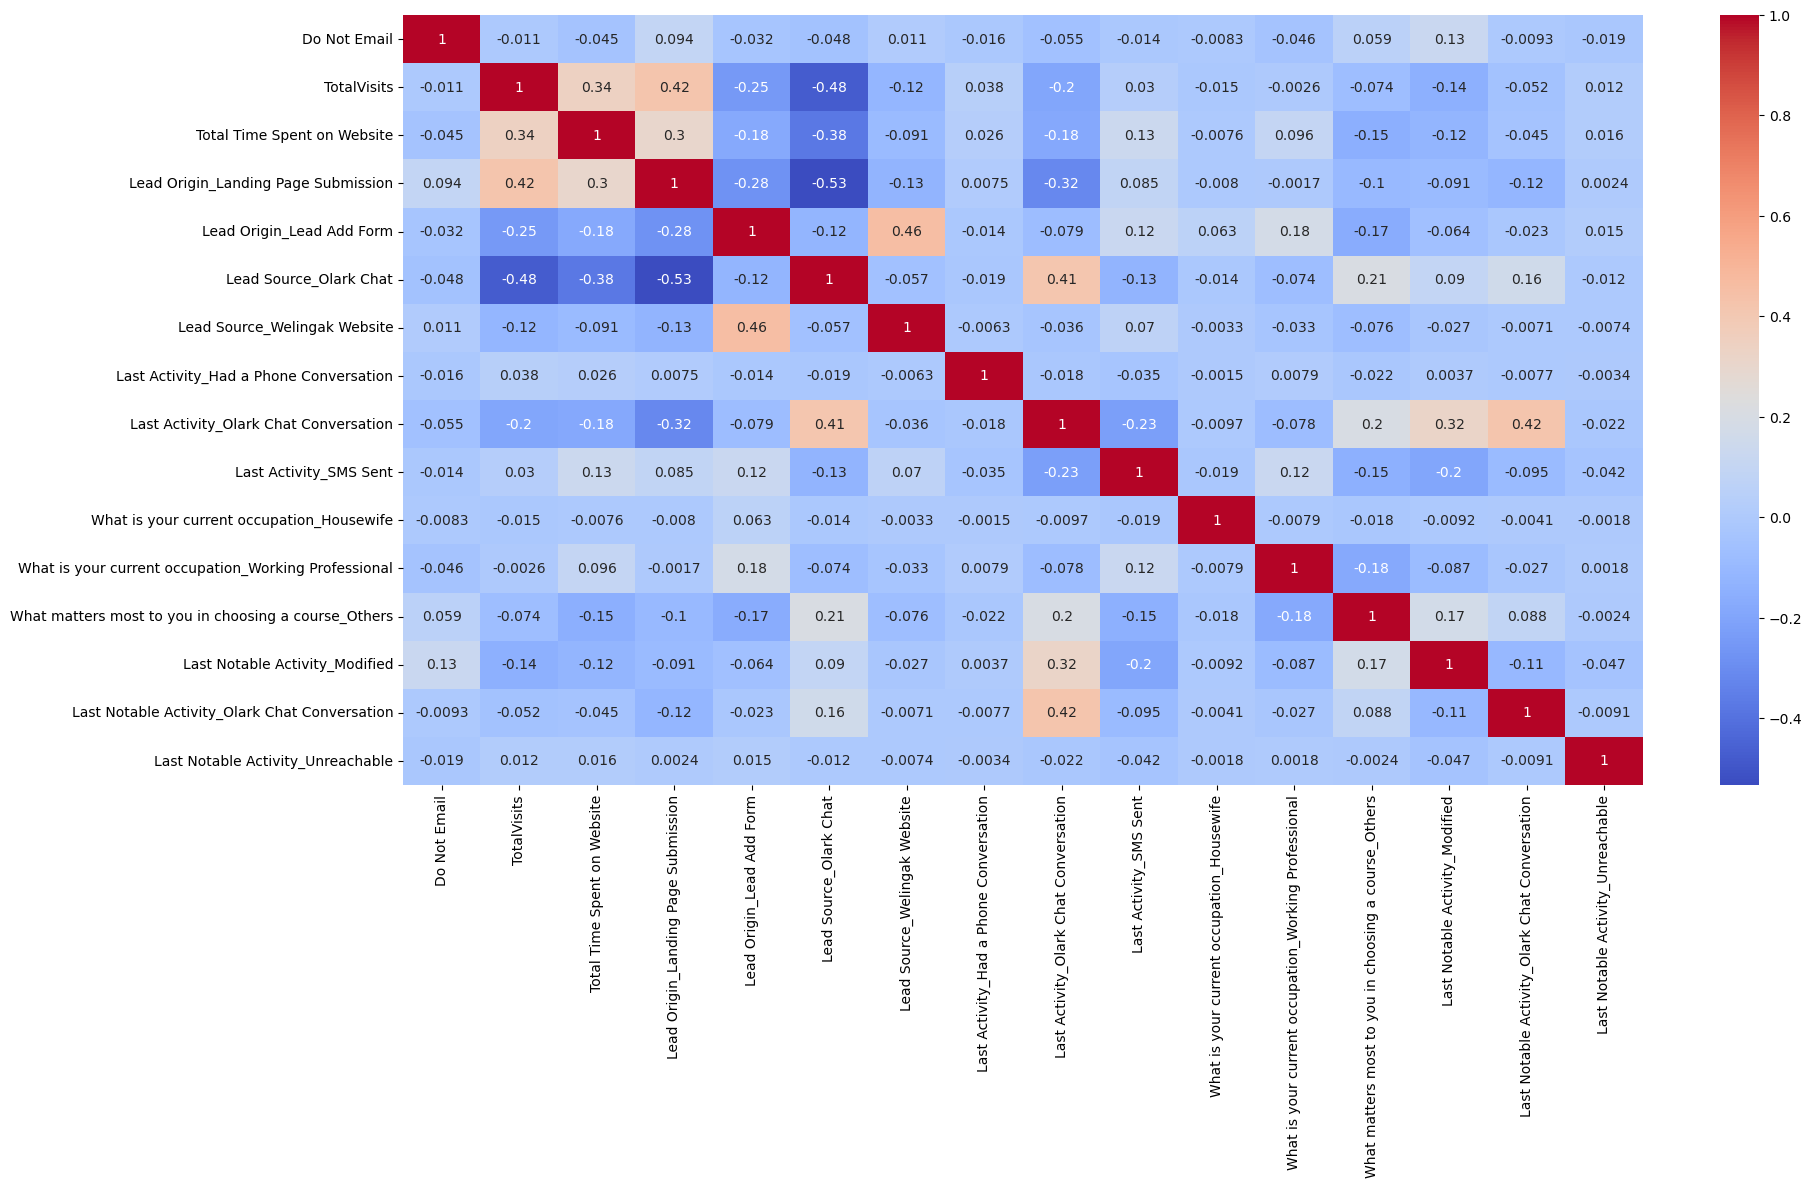

In [93]:
# Plotting heatmap again after dropping highly correlated variables.

plt.figure(figsize=[20,10])
sns.heatmap(X_train_rfe.corr(), annot=True, cmap='coolwarm')
plt.show()

### Building 1st Model

In [94]:
X_train_sm = sm.add_constant(X_train_rfe)

lr_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2508.4
Date:                Mon, 21 Oct 2024   Deviance:                       5016.9
Time:                        09:39:00   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4097
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9949      0.117    -17.054      0.000      -2.224      -1.766
Do Not Email                                            -1.3818      0.174     -7.919      0.000      -1.724      -1.040
TotalVisits                                              0.9631      0.239      4.021      0.000       0.494       1.433
Total Time Spent on Website                              4.6583      0.172     27.134      0.000       4.322       4.995
Lead Origin_Landing Page Submission                     -0.3214      0.092     -3.502      0.000      -0.501      -0.141
Lead Origin_Lead Add Form                                4.0115      0.270     14.870      0.000       3.483       4.540
Lead Source_Olark Chat                                   1.3762      0.134     10.275      0.000       1.114       1.639
Lead Source_Welingak Website                             2.2325      1.041      2.144      0.032       0.192       4.273
Last Activity_Had a Phone Conversation                   2.3066      0.637      3.622      0.000       1.058       3.555
Last Activity_Olark Chat Conversation                   -0.8089      0.198     -4.093      0.000      -1.196      -0.422
Last Activity_SMS Sent                                   1.2855      0.077     16.792      0.000       1.135       1.436
What is your current occupation_Housewife               22.7858   1.78e+04      0.001      0.999   -3.49e+04     3.5e+04
What is your current occupation_Working Professional     2.5649      0.194     13.244      0.000       2.185       2.944
What matters most to you in choosing a course_Others    -1.1819      0.089    -13.308      0.000      -1.356      -1.008
Last Notable Activity_Modified                          -0.7447      0.087     -8.585      0.000      -0.915      -0.575
Last Notable Activity_Olark Chat Conversation           -0.6774      0.389     -1.742      0.082      -1.440       0.085
Last Notable Activity_Unreachable                        2.0570      0.540      3.812      0.000       0.999       3.115
========================================================================================================================
"""

In [95]:
# Predicting values

y_train_pred = lr_1.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [96]:
# Creating a dataframe with Target variable (Converted), Conversion_probability and Predictions 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values,
                                  'Conversion_prob': y_train_pred})
y_train_pred_final['ID'] = y_train.index

y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted
0,1,0.973238,1467,1
1,0,0.021278,108,0
2,1,0.542912,7858,1
3,1,0.374000,5220,0
4,0,0.141783,3871,0


In [97]:
# Defining evaluation function to frequently check Model evaluation metrics.

def evaluation(x,y):
    print('Model Evaluation Metrics')
    print('-'*50)
    
    confusion = confusion_matrix(x,y) # Finding confusion metrics
    TN = confusion[0,0]    # Defining True negatives as TN
    FN = confusion[1,0]    # Defining False negatives as FN
    TP = confusion[1,1]    # Defining True positives as TP
    FP = confusion[0,1]    # Defining False positives as FP
    
    print('Confusion Metrics :')
    print('True Negative:',TN,'      ','False Positive:',FP)
    print('False Negative:',FN,'      ','True Postive:',TP)
    print('-'*50)
    print('Model Accuracy:', round(accuracy_score(x,y),2))
    print('Sensitivity:', round(TP / float(TP+FN),2))
    print('Specificity:', round(TN / float(TN+FP),2))
    print('False Positive Rate:', round(FP / float(FP+TN),2))
    print('Precision:', round(precision_score(x,y),2))
    print('Recall:', round(recall_score(x,y),2))  
    print('-'*50)

In [98]:
# Checking evaluation metrics

evaluation(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 3510        False Positive: 416
False Negative: 720        True Postive: 1647
--------------------------------------------------
Model Accuracy: 0.82
Sensitivity: 0.7
Specificity: 0.89
False Positive Rate: 0.11
Precision: 0.8
Recall: 0.7
--------------------------------------------------


In [99]:
# Defining function to frequently check Variance Inflation Factor of the model.

def variance(x):
    x = x
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [100]:
# Checking Variance Inflation Factor

variance(X_train_rfe)

,Feature,VIF
3,Lead Origin_Landing Page Submission,2.73
1,TotalVisits,2.60
2,Total Time Spent on Website,2.08
8,Last Activity_Olark Chat Conversation,1.97
13,Last Notable Activity_Modified,1.83
5,Lead Source_Olark Chat,1.57
12,What matters most to you in choosing a course_...,1.54
9,Last Activity_SMS Sent,1.53
4,Lead Origin_Lead Add Form,1.47
14,Last Notable Activity_Olark Chat Conversation,1.35


### Obeservation
- The features 'What is your current occupation_Housewife' and 'Last Notable Activity_Olark Chat Conversation' had p-values greater than 0.05, meaning their coefficients were not statistically significant. However, all the VIFs were within acceptable limits. As a result, in the next model, the 'What is your current occupation_Housewife' feature was removed from the set of predictors.

In [101]:
# 'What is your current occupation_Housewife' having high p-value of 0.99 so we'll drop this feature.

X_train_rfe.drop(['What is your current occupation_Housewife'], axis=1, inplace=True)

### Building 2nd Model

In [102]:
X_train_sm = sm.add_constant(X_train_rfe)

lr_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.4
Date:                Mon, 21 Oct 2024   Deviance:                       5022.8
Time:                        09:39:01   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4091
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9897      0.117    -17.023      0.000      -2.219      -1.761
Do Not Email                                            -1.3838      0.175     -7.930      0.000      -1.726      -1.042
TotalVisits                                              0.9575      0.239      4.000      0.000       0.488       1.427
Total Time Spent on Website                              4.6528      0.171     27.130      0.000       4.317       4.989
Lead Origin_Landing Page Submission                     -0.3185      0.092     -3.472      0.001      -0.498      -0.139
Lead Origin_Lead Add Form                                4.0337      0.269     14.973      0.000       3.506       4.562
Lead Source_Olark Chat                                   1.3733      0.134     10.258      0.000       1.111       1.636
Lead Source_Welingak Website                             2.2076      1.041      2.120      0.034       0.167       4.248
Last Activity_Had a Phone Conversation                   2.3035      0.637      3.618      0.000       1.055       3.551
Last Activity_Olark Chat Conversation                   -0.8088      0.198     -4.093      0.000      -1.196      -0.421
Last Activity_SMS Sent                                   1.2818      0.077     16.752      0.000       1.132       1.432
What is your current occupation_Working Professional     2.5617      0.194     13.229      0.000       2.182       2.941
What matters most to you in choosing a course_Others    -1.1831      0.089    -13.327      0.000      -1.357      -1.009
Last Notable Activity_Modified                          -0.7467      0.087     -8.612      0.000      -0.917      -0.577
Last Notable Activity_Olark Chat Conversation           -0.6786      0.389     -1.745      0.081      -1.441       0.084
Last Notable Activity_Unreachable                        2.0529      0.540      3.804      0.000       0.995       3.111
========================================================================================================================
"""

In [103]:
# Predicting values 

y_train_pred = lr_2.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [104]:
# Creating a dataframe with Target variable (Converted), Conversion_probability and Predictions 

y_train_pred_final = pd.DataFrame({'Converted': y_train.values,
                                  'Conversion_prob': y_train_pred})
y_train_pred_final['ID'] = y_train.index

y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted
0,1,0.973179,1467,1
1,0,0.021339,108,0
2,1,0.542313,7858,1
3,1,0.373404,5220,0
4,0,0.141919,3871,0


In [105]:
# Checking Variance Inflation Factor of the Model

variance(X_train_rfe)

,Feature,VIF
3,Lead Origin_Landing Page Submission,2.73
1,TotalVisits,2.60
2,Total Time Spent on Website,2.08
8,Last Activity_Olark Chat Conversation,1.97
12,Last Notable Activity_Modified,1.83
5,Lead Source_Olark Chat,1.57
11,What matters most to you in choosing a course_...,1.54
9,Last Activity_SMS Sent,1.53
4,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_Olark Chat Conversation,1.35


In [106]:
# Checking Evaluation Metrics

evaluation(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 3510        False Positive: 416
False Negative: 721        True Postive: 1646
--------------------------------------------------
Model Accuracy: 0.82
Sensitivity: 0.7
Specificity: 0.89
False Positive Rate: 0.11
Precision: 0.8
Recall: 0.7
--------------------------------------------------


### Observation
- The feature 'Last Notable Activity_Olark Chat Conversation' had p-values greater than 0.05, meaning their coefficients were not statistically significant. However, all the VIFs were within acceptable limits. As a result, in the next model, 'Last Notable Activity_Olark Chat Conversation' feature was removed from the set of predictors.

In [107]:
# 'Last Notable Activity_Olark Chat Conversation' having p-value of 0.081 so we'll drop this feature.

X_train_rfe.drop(['Last Notable Activity_Olark Chat Conversation'], axis=1, inplace=True)

### Building 3rd Model

In [108]:
X_train_sm = sm.add_constant(X_train_rfe)

lr_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.0
Date:                Mon, 21 Oct 2024   Deviance:                       5026.0
Time:                        09:39:01   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9940      0.117    -17.072      0.000      -2.223      -1.765
Do Not Email                                            -1.3903      0.174     -7.981      0.000      -1.732      -1.049
TotalVisits                                              0.9564      0.239      3.999      0.000       0.488       1.425
Total Time Spent on Website                              4.6395      0.171     27.112      0.000       4.304       4.975
Lead Origin_Landing Page Submission                     -0.3188      0.092     -3.479      0.001      -0.498      -0.139
Lead Origin_Lead Add Form                                4.0260      0.269     14.947      0.000       3.498       4.554
Lead Source_Olark Chat                                   1.3739      0.134     10.264      0.000       1.112       1.636
Lead Source_Welingak Website                             2.1844      1.040      2.100      0.036       0.145       4.223
Last Activity_Had a Phone Conversation                   2.2954      0.636      3.607      0.000       1.048       3.543
Last Activity_Olark Chat Conversation                   -0.9947      0.174     -5.733      0.000      -1.335      -0.655
Last Activity_SMS Sent                                   1.2840      0.076     16.798      0.000       1.134       1.434
What is your current occupation_Working Professional     2.5613      0.194     13.222      0.000       2.182       2.941
What matters most to you in choosing a course_Others    -1.1890      0.089    -13.404      0.000      -1.363      -1.015
Last Notable Activity_Modified                          -0.7100      0.084     -8.468      0.000      -0.874      -0.546
Last Notable Activity_Unreachable                        2.0628      0.540      3.823      0.000       1.005       3.120
========================================================================================================================
"""

In [109]:
# Predicting values

y_train_pred = lr_3.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [110]:
# Creating a dataframe with Target variable (Converted), Conversion_probability and Predictions

y_train_pred_final = pd.DataFrame({'Converted': y_train,
                                  'Conversion_prob': y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted
1467,1,0.972963,1467,1
108,0,0.034019,108,0
7858,1,0.541437,7858,1
5220,1,0.371652,5220,0
3871,0,0.140745,3871,0


In [111]:
# Checking Variance Inflation Factor

variance(X_train_rfe)

,Feature,VIF
3,Lead Origin_Landing Page Submission,2.73
1,TotalVisits,2.60
2,Total Time Spent on Website,2.07
12,Last Notable Activity_Modified,1.68
5,Lead Source_Olark Chat,1.57
8,Last Activity_Olark Chat Conversation,1.57
11,What matters most to you in choosing a course_...,1.54
9,Last Activity_SMS Sent,1.53
4,Lead Origin_Lead Add Form,1.46
6,Lead Source_Welingak Website,1.30


In [112]:
# Checking Evaluation Metrics of the Model

evaluation(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 3504        False Positive: 422
False Negative: 713        True Postive: 1654
--------------------------------------------------
Model Accuracy: 0.82
Sensitivity: 0.7
Specificity: 0.89
False Positive Rate: 0.11
Precision: 0.8
Recall: 0.7
--------------------------------------------------


### We can see that all the beta coefficients are now statistically significant also there is no multicolinearity present. Also the model accuracy is 0.82, sensitivity is 0.7 and specificity is 0.89, So we choose lr_3 as our final model for Predictions
******************************************************************************************************************

In [113]:
print(lr_3.summary())
print(variance(X_train_rfe))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.0
Date:                Mon, 21 Oct 2024   Deviance:                       5026.0
Time:                        09:39:01   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### ROC Curve

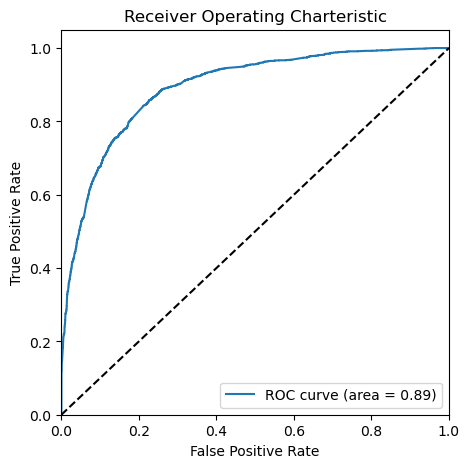

In [114]:
# Plotting ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Converted'], 
                                         y_train_pred_final['Conversion_prob'], 
                                         drop_intermediate=False)

auc_score = metrics.roc_auc_score(y_train_pred_final['Converted'], 
                                  y_train_pred_final['Conversion_prob'])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)

plt.plot([0,1],[0,1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charteristic')

plt.legend()
plt.show()

## Finding optimal threshold  

### By using Sensitivity and Specificity 

In [115]:
# Creating different label columns using different probability cutoffs

numbers = [float(x)/10 for x in range(10)]

for i in numbers :
    y_train_pred_final[i] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1467,1,0.972963,1467,1,1,1,1,1,1,1,1,1,1,1
108,0,0.034019,108,0,1,0,0,0,0,0,0,0,0,0
7858,1,0.541437,7858,1,1,1,1,1,1,1,0,0,0,0
5220,1,0.371652,5220,0,1,1,1,1,0,0,0,0,0,0
3871,0,0.140745,3871,0,1,1,0,0,0,0,0,0,0,0


In [116]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])

for i in numbers :
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], 
                                  y_train_pred_final[i])
    total = sum(sum(cm)) 
    accuracy = (cm[0,0] + cm[1,1]) / total
    sensi = cm[1,1] / (cm[1,0] + cm[1,1])
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

cutoff_df.head(10)

,prob,accuracy,sensi,speci
0.0,0.0,0.376132,1.000000,0.000000
0.1,0.1,0.632608,0.966624,0.431228
0.2,0.2,0.763547,0.915082,0.672185
0.3,0.3,0.800095,0.869455,0.758278
0.4,0.4,0.817098,0.768906,0.846154
0.5,0.5,0.819641,0.698775,0.892511
0.6,0.6,0.812013,0.629066,0.922313
0.7,0.7,0.786747,0.514998,0.950586
0.8,0.8,0.762911,0.419941,0.969689
0.9,0.9,0.721595,0.279256,0.988283


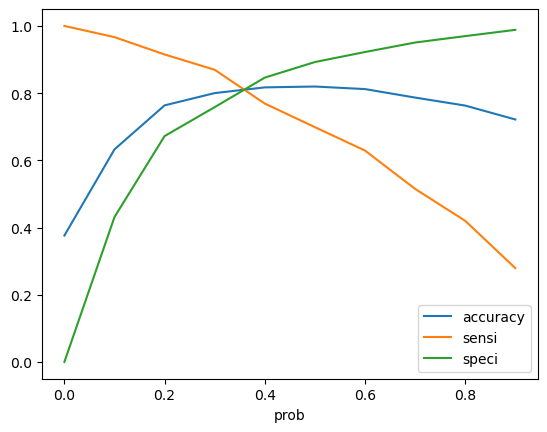

In [117]:
# Ploting Accuracy, Sensitivity and Specificity for different probability cutoffs

cutoff_df.plot(x = 'prob',
               y = ['accuracy','sensi','speci'])

plt.show()

- In the above plot, we found that 0.35 is the optimal point to set as cutoff probability for our model.

In [118]:
# Creating 'final_predicted' column and generating prediction based on probability cutoff 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head(15)

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1467,1,0.972963,1467,1,1,1,1,1,1,1,1,1,1,1,1
108,0,0.034019,108,0,1,0,0,0,0,0,0,0,0,0,0
7858,1,0.541437,7858,1,1,1,1,1,1,1,0,0,0,0,1
5220,1,0.371652,5220,0,1,1,1,1,0,0,0,0,0,0,1
3871,0,0.140745,3871,0,1,1,0,0,0,0,0,0,0,0,0
686,1,0.611395,686,1,1,1,1,1,1,1,1,0,0,0,1
1694,0,0.225290,1694,0,1,1,1,0,0,0,0,0,0,0,0
2180,0,0.084141,2180,0,1,0,0,0,0,0,0,0,0,0,0
6845,0,0.140745,6845,0,1,1,0,0,0,0,0,0,0,0,0
191,0,0.043981,191,0,1,0,0,0,0,0,0,0,0,0,0


### Model Evaluation on train dataset as 0.35 cutoff probability

In [119]:
evaluation(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 3205        False Positive: 721
False Negative: 451        True Postive: 1916
--------------------------------------------------
Model Accuracy: 0.81
Sensitivity: 0.81
Specificity: 0.82
False Positive Rate: 0.18
Precision: 0.73
Recall: 0.81
--------------------------------------------------


## Finding optimal threshold by using

### Precision and Recall tradeoff

In [120]:
# Checking precision score

precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.726583238528631

In [121]:
# Checking recall score

recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])

0.8094634558512885

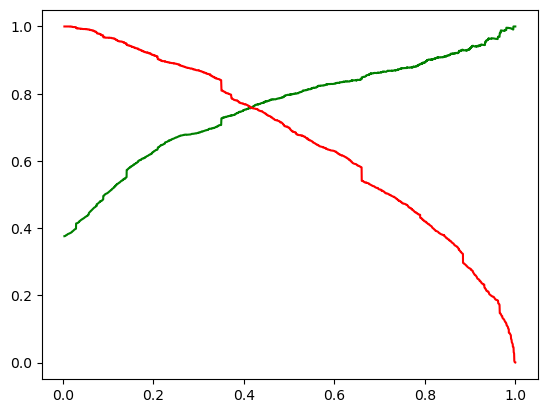

In [122]:
# Plotting Precision and Recall

p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'],
                               y_train_pred_final['Conversion_prob'])

plt.plot(thresholds, p[:-1], 'g-')
plt.plot(thresholds, r[:-1], 'r-')

plt.show()


In [123]:
# Creating 'final_predicted_pr' column and generating prediction based on precision/recall probability cutoff 0.42 

y_train_pred_final['final_predicted_pr'] = y_train_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
1467,1,0.972963,1467,1,1,1,1,1,1,1,1,1,1,1,1,1
108,0,0.034019,108,0,1,0,0,0,0,0,0,0,0,0,0,0
7858,1,0.541437,7858,1,1,1,1,1,1,1,0,0,0,0,1,1
5220,1,0.371652,5220,0,1,1,1,1,0,0,0,0,0,0,1,0
3871,0,0.140745,3871,0,1,1,0,0,0,0,0,0,0,0,0,0


In [124]:
# Checking Model Evaluation Metrics

evaluation(y_train_pred_final['Converted'], y_train_pred_final['final_predicted_pr'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 3363        False Positive: 563
False Negative: 576        True Postive: 1791
--------------------------------------------------
Model Accuracy: 0.82
Sensitivity: 0.76
Specificity: 0.86
False Positive Rate: 0.14
Precision: 0.76
Recall: 0.76
--------------------------------------------------


### Generating Lead Score

In [125]:
y_train_pred_final['Lead score'] =round(y_train_pred_final['Conversion_prob'] * 100, 2)
y_train_pred_final.head(10)

,Converted,Conversion_prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr,Lead score
1467,1,0.972963,1467,1,1,1,1,1,1,1,1,1,1,1,1,1,97.30
108,0,0.034019,108,0,1,0,0,0,0,0,0,0,0,0,0,0,3.40
7858,1,0.541437,7858,1,1,1,1,1,1,1,0,0,0,0,1,1,54.14
5220,1,0.371652,5220,0,1,1,1,1,0,0,0,0,0,0,1,0,37.17
3871,0,0.140745,3871,0,1,1,0,0,0,0,0,0,0,0,0,0,14.07
686,1,0.611395,686,1,1,1,1,1,1,1,1,0,0,0,1,1,61.14
1694,0,0.225290,1694,0,1,1,1,0,0,0,0,0,0,0,0,0,22.53
2180,0,0.084141,2180,0,1,0,0,0,0,0,0,0,0,0,0,0,8.41
6845,0,0.140745,6845,0,1,1,0,0,0,0,0,0,0,0,0,0,14.07
191,0,0.043981,191,0,1,0,0,0,0,0,0,0,0,0,0,0,4.40


## Making prediction on test

In [126]:
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8692,0,0,0,3.0,304,1.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6126,0,0,1,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5198,0,0,1,3.0,425,1.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,0,0,1,4.0,861,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9225,1,0,0,2.0,74,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
# Transform the numerical variables of test dataset.

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2698.000000,2698.000000,2698.000000
mean,0.184014,0.214531,0.141706
std,0.171413,0.241745,0.124938
min,0.000000,0.000000,0.000000
25%,0.058824,0.001430,0.062500
50%,0.176471,0.109155,0.125000
75%,0.294118,0.411312,0.187500
max,1.000000,0.979754,0.937500


In [128]:
# Creating X and y

y_test = df_test.pop('Converted')
X_test = df_test

In [129]:
# Fetching only selected lr_3 model columns.

X_test = X_test[X_train_rfe.columns]
X_test.shape

(2698, 14)

In [130]:
# Creating predictions

y_test_pred = lr_3.predict(sm.add_constant(X_test))
y_test_pred.values.reshape(-1)

array([0.44047263, 0.9649708 , 0.07833617, ..., 0.34976126, 0.23999383,
       0.00234738])

In [131]:
# Creating a dataframe with Target variable (Converted), Conversion_probability and Predictions

y_test_pred_final = pd.DataFrame({'Converted': y_test.values,
                                 'Conversion_prob': y_test_pred})
y_test_pred_final['Predicted'] = y_test_pred_final['Conversion_prob'].apply(lambda x: 1 if x > 0.35 else 0)

y_test_pred_final.head()

,Converted,Conversion_prob,Predicted
8692,0,0.440473,1
6126,1,0.964971,1
5198,1,0.078336,0
4979,1,0.781290,1
9225,0,0.015528,0


In [132]:
# Generating Lead Score on Test dataset

y_test_pred_final['Lead score'] = round(y_test_pred_final['Conversion_prob'] * 100, 2)
y_test_pred_final.head(10)

,Converted,Conversion_prob,Predicted,Lead score
8692,0,0.440473,1,44.05
6126,1,0.964971,1,96.50
5198,1,0.078336,0,7.83
4979,1,0.781290,1,78.13
9225,0,0.015528,0,1.55
3533,1,0.028376,0,2.84
2726,1,0.734293,1,73.43
3450,0,0.007190,0,0.72
7683,1,0.951207,1,95.12
6286,0,0.012037,0,1.20


In [133]:
# Checking Model Evaluation Metrics on test dataset on 0.35 cuttoff probability.

evaluation(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 1335        False Positive: 331
False Negative: 199        True Postive: 833
--------------------------------------------------
Model Accuracy: 0.8
Sensitivity: 0.81
Specificity: 0.8
False Positive Rate: 0.2
Precision: 0.72
Recall: 0.81
--------------------------------------------------


## -----------------------------------------------------------------------------------------------------------------------------

In [134]:
# Adding another column 'Predicted_pr' for 0.42 cuttoff probability.

y_test_pred_final['Predicted_pr'] = y_test_pred_final['Conversion_prob'].apply(lambda x:1 if x > 0.42 else 0)
y_test_pred_final.head()

,Converted,Conversion_prob,Predicted,Lead score,Predicted_pr
8692,0,0.440473,1,44.05,1
6126,1,0.964971,1,96.50,1
5198,1,0.078336,0,7.83,0
4979,1,0.781290,1,78.13,1
9225,0,0.015528,0,1.55,0


In [135]:
# Checking Model Evaluation Metrics on test dataset on 0.42 cuttoff probability.

evaluation(y_test_pred_final['Converted'], y_test_pred_final['Predicted_pr'])

Model Evaluation Metrics
--------------------------------------------------
Confusion Metrics :
True Negative: 1405        False Positive: 261
False Negative: 253        True Postive: 779
--------------------------------------------------
Model Accuracy: 0.81
Sensitivity: 0.75
Specificity: 0.84
False Positive Rate: 0.16
Precision: 0.75
Recall: 0.75
--------------------------------------------------


# COLCLUSION & RECOMMENDATION

- In line with business requirements, we calculated the Lead Score (ranging from 0 to 100) using the Logistic Regression model. A higher score indicates a hot lead (more likely to convert), while a lower score signifies a cold lead (less likely to convert).
- The Lead Score will help identify hot leads more quickly and efficiently, leading to a reduction in lead conversion time and an increase in the conversion rate. Leads should be ranked in descending order based on their Lead Scores.
- Leads with higher Lead Scores should be prioritized for phone calls or contact. These hot leads should receive special attention, such as assigning a dedicated Support Point of Contact (SPOC) to a small group of high-scoring leads, as they have a strong likelihood of conversion.
- Leads with medium Lead Scores are also promising candidates for conversion. They should be contacted, and the right questions should be asked to better understand their needs and challenges. Addressing their concerns, such as making changes to existing courses, introducing new courses, adjusting class schedules, or offering flexible financial options for fees, could help convert these leads successfully.
- Cold leads should be contacted once the business achieves a strong conversion rate with leads that have high and medium Lead Scores. Since the likelihood of conversion is lower with these leads, they can be included in the company’s more aggressive marketing strategy.